<a href="https://colab.research.google.com/github/shastraOfTrading/obv-daily/blob/main/OnBalanceVolume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install necessary libraries
!pip install yfinance pandas matplotlib

# Step 2: Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Step 3: Fetch real-time data
stock_symbol = 'RELIANCE.NS'  # Example: Apple Inc.
data = yf.download(stock_symbol, start='2024-01-01', end='2024-10-14', interval='1d')

[*********************100%***********************]  1 of 1 completed


Data fetched:
                            Open         High          Low        Close  \
Date                                                                      
2024-01-01 00:00:00  2580.550049  2606.850098  2573.149902  2590.250000   
2024-01-02 00:00:00  2585.000000  2615.000000  2573.000000  2611.699951   
2024-01-03 00:00:00  2610.000000  2634.000000  2577.199951  2583.300049   
2024-01-04 00:00:00  2588.000000  2609.850098  2579.100098  2596.649902   
2024-01-05 00:00:00  2602.899902  2619.850098  2598.000000  2607.699951   

                       Adj Close     Volume       OBV    Signal  
Date                                                             
2024-01-01 00:00:00  2581.488525  2015270.0   2015270  Sideways  
2024-01-02 00:00:00  2602.865967  3724400.0   5739670       Buy  
2024-01-03 00:00:00  2574.562012  4518768.0   1220902      Sell  
2024-01-04 00:00:00  2587.866699  4806389.0   6027291       Buy  
2024-01-05 00:00:00  2598.879395  4043203.0  10070494       Buy 

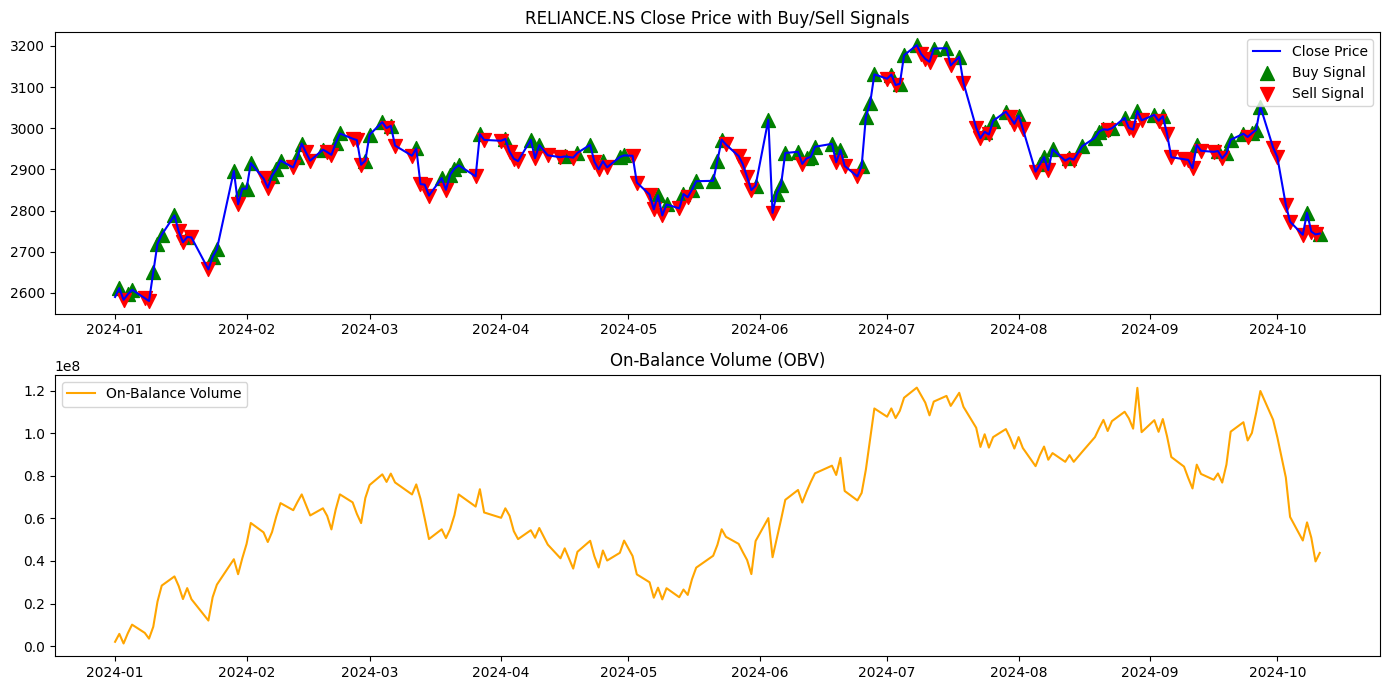

In [13]:
# Check if data is fetched correctly
print("Data fetched:")
print(data.head())  # Display first few rows to confirm data

# Step 4: Handle missing data
if data.empty or data['Close'].isna().all():
    print("No valid data fetched. Please check the stock symbol and date range.")
else:
    # Fill missing values or handle them as needed
    data = data.dropna()  # Drop any rows with NaN values

    # Step 5: Calculate On-Balance Volume (OBV)
    data['OBV'] = 0  # Initialize OBV column with zeros
    data.loc[data.index[0], 'OBV'] = data['Volume'].iloc[0]  # Set initial OBV to the first volume

    for i in range(1, len(data)):
        if data['Close'].iloc[i] > data['Close'].iloc[i - 1]:  # Price increased
            data.loc[data.index[i], 'OBV'] = data.loc[data.index[i - 1], 'OBV'] + data['Volume'].iloc[i]
        elif data['Close'].iloc[i] < data['Close'].iloc[i - 1]:  # Price decreased
            data.loc[data.index[i], 'OBV'] = data.loc[data.index[i - 1], 'OBV'] - data['Volume'].iloc[i]
        else:  # Price unchanged
            data.loc[data.index[i], 'OBV'] = data.loc[data.index[i - 1], 'OBV']

    # Step 6: Generate buy/sell/sideways signals
    data['Signal'] = 'Sideways'  # Default to sideways

    for i in range(1, len(data)):
        if data['OBV'].iloc[i] > data['OBV'].iloc[i - 1] and data['Close'].iloc[i] > data['Close'].iloc[i - 1]:
            data.loc[data.index[i], 'Signal'] = 'Buy'
        elif data['OBV'].iloc[i] < data['OBV'].iloc[i - 1] and data['Close'].iloc[i] < data['Close'].iloc[i - 1]:
            data.loc[data.index[i], 'Signal'] = 'Sell'

    # Step 7: Check the last few rows for signals
    print(data[['Close', 'OBV', 'Signal']].tail(10))  # Display last few rows

    # Step 8: Plotting the results with signals
    plt.figure(figsize=(14, 7))

    # Plotting Closing Price with Buy/Sell Signals
    plt.subplot(2, 1, 1)
    plt.plot(data['Close'], label='Close Price', color='blue')
    buy_signals = data[data['Signal'] == 'Buy']
    sell_signals = data[data['Signal'] == 'Sell']
    plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', label='Buy Signal', s=100)
    plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', label='Sell Signal', s=100)
    plt.title(f'{stock_symbol} Close Price with Buy/Sell Signals')
    plt.legend()

    # Plotting OBV
    plt.subplot(2, 1, 2)
    plt.plot(data['OBV'], label='On-Balance Volume', color='orange')
    plt.title('On-Balance Volume (OBV)')
    plt.legend()

    plt.tight_layout()
    plt.show()